In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [3]:
unknown_traders = pd.read_parquet("../data/unknown_traders.parquet")

In [32]:
old_unknown_traders = pd.read_parquet("../data/old_unknown_traders.parquet")

In [4]:
unknown_traders.columns

Index(['trader_address', 'market_creator', 'trade_id', 'creation_timestamp',
       'title', 'market_status', 'collateral_amount', 'outcome_index',
       'trade_fee_amount', 'outcomes_tokens_traded', 'current_answer',
       'is_invalid', 'winning_trade', 'earnings', 'redeemed',
       'redeemed_amount', 'num_mech_calls', 'mech_fee_amount', 'net_earnings',
       'roi', 'staking', 'nr_mech_calls'],
      dtype='object')

In [6]:
max(unknown_traders.creation_timestamp)

Timestamp('2025-01-11 02:06:25+0000', tz='UTC')

In [7]:
min(unknown_traders.creation_timestamp)

Timestamp('2024-12-01 12:55:00+0000', tz='UTC')

In [33]:
max(old_unknown_traders.creation_timestamp)

Timestamp('2024-12-14 03:18:30+0000', tz='UTC')

In [34]:
min(old_unknown_traders.creation_timestamp)

Timestamp('2024-10-13 00:01:10+0000', tz='UTC')

In [6]:
from datetime import datetime, timezone
def transform_to_datetime(x):
    return datetime.fromtimestamp(int(x), tz=timezone.utc)

In [5]:
def add_creation_date(df):
    try:
        df["creationTimestamp"] = df["creationTimestamp"].apply(
            lambda x: transform_to_datetime(x)
        )
        df["creation_timestamp"] = pd.to_datetime(df["creationTimestamp"])
    except Exception:
        print("Ignore")
    
    df["creation_date"] = df["creation_timestamp"].dt.date
    df["creation_date"] = pd.to_datetime(df["creation_date"])
    return df

In [35]:
old_unknown_traders = add_creation_date(old_unknown_traders)

Ignore


In [7]:
unknown_traders = add_creation_date(unknown_traders)

Ignore


In [8]:
unknown_traders["month_year_week"] =(
        pd.to_datetime(unknown_traders["creation_timestamp"]).dt.to_period("W").dt.strftime("%b-%d-%Y")
)

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_6876/1622588175.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  pd.to_datetime(unknown_traders["creation_timestamp"]).dt.to_period("W").dt.strftime("%b-%d-%Y")


In [9]:
unknown_traders.head()

trader_address market_creator  \
0  0x05e8bbdb89c84a14d05194bbbae81caf2340db72     quickstart   
1  0x05e8bbdb89c84a14d05194bbbae81caf2340db72     quickstart   
2  0x05e8bbdb89c84a14d05194bbbae81caf2340db72     quickstart   
3  0x05e8bbdb89c84a14d05194bbbae81caf2340db72     quickstart   
4  0x05e8bbdb89c84a14d05194bbbae81caf2340db72     quickstart   

                                            trade_id  \
0  0x083c9f03dfc4072082b9e10aa2137151346f6fd30x05...   
1  0x0b52672f29f059b1d0c3a297b28670fb8d92c4bd0x05...   
2  0x0de08cc50fa523de23b95ce7ad773e038fb8590d0x05...   
3  0x0f90a2ea8a8b0fbca021405563e763acb9f7d9460x05...   
4  0x13e42a5f5422df80a05c4b7b8d01bd21be82289b0x05...   

         creation_timestamp  \
0 2025-01-12 12:21:40+00:00   
1 2024-12-27 00:21:40+00:00   
2 2025-01-09 06:21:15+00:00   
3 2024-12-27 18:21:35+00:00   
4 2025-01-08 18:22:00+00:00   

                                               title market_status  \
0  Will federal prosecutors announce any new char...        CLOSED   
1  Will a third fight between Usyk and Fury be of...        CLOSED   
2  Will record-low temperatures be recorded in at...        CLOSED   
3  Will any new unfair labor practice charges be ...        CLOSED   
4  Will the Israeli government publicly acknowled...        CLOSED   

   collateral_amount outcome_index  trade_fee_amount  outcomes_tokens_traded  \
0           0.204245             1          0.002042                0.279142   
1           0.943883             1          0.009439                1.302968   
2           2.185557             1          0.021856                3.456138   
3           0.430373             0          0.004304                0.586244   
4           3.227216             1          0.032272                7.405353   

   ...  redeemed  redeemed_amount  num_mech_calls  mech_fee_amount  \
0  ...      True         0.279142               0              0.0   
1  ...      True         1.302968               0              0.0   
2  ...      True         0.000000               0              0.0   
3  ...      True         0.586244               0              0.0   
4  ...      True         7.405353               0              0.0   

   net_earnings       roi   staking  nr_mech_calls  creation_date  \
0      0.072854  0.353167  non_Olas            NaN     2025-01-12   
1      0.349646  0.366766  non_Olas            NaN     2024-12-27   
2     -2.207412 -1.000000  non_Olas            NaN     2025-01-09   
3      0.151567  0.348688  non_Olas            NaN     2024-12-27   
4      4.145865  1.271938  non_Olas            NaN     2025-01-08   

   month_year_week  
0      Jan-12-2025  
1      Dec-29-2024  
2      Jan-12-2025  
3      Dec-29-2024  
4      Jan-12-2025  

[5 rows x 24 columns]

In [15]:
unknown_traders["month_year_week"] = (
        pd.to_datetime(unknown_traders["creation_timestamp"]).dt.to_period("W").dt.start_time.dt.strftime("%b-%d-%Y")
    )

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_6876/928490420.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  pd.to_datetime(unknown_traders["creation_timestamp"]).dt.to_period("W").dt.start_time.dt.strftime("%b-%d-%Y")


In [12]:
unknown_traders["month_year_week"] =(
        unknown_traders["creation_timestamp"].dt.to_period("W")
)

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_6876/589443447.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  unknown_traders["creation_timestamp"].dt.to_period("W")


In [16]:
unknown_traders.head()

trader_address market_creator  \
0  0x05e8bbdb89c84a14d05194bbbae81caf2340db72     quickstart   
1  0x05e8bbdb89c84a14d05194bbbae81caf2340db72     quickstart   
2  0x05e8bbdb89c84a14d05194bbbae81caf2340db72     quickstart   
3  0x05e8bbdb89c84a14d05194bbbae81caf2340db72     quickstart   
4  0x05e8bbdb89c84a14d05194bbbae81caf2340db72     quickstart   

                                            trade_id  \
0  0x083c9f03dfc4072082b9e10aa2137151346f6fd30x05...   
1  0x0b52672f29f059b1d0c3a297b28670fb8d92c4bd0x05...   
2  0x0de08cc50fa523de23b95ce7ad773e038fb8590d0x05...   
3  0x0f90a2ea8a8b0fbca021405563e763acb9f7d9460x05...   
4  0x13e42a5f5422df80a05c4b7b8d01bd21be82289b0x05...   

         creation_timestamp  \
0 2025-01-12 12:21:40+00:00   
1 2024-12-27 00:21:40+00:00   
2 2025-01-09 06:21:15+00:00   
3 2024-12-27 18:21:35+00:00   
4 2025-01-08 18:22:00+00:00   

                                               title market_status  \
0  Will federal prosecutors announce any new char...        CLOSED   
1  Will a third fight between Usyk and Fury be of...        CLOSED   
2  Will record-low temperatures be recorded in at...        CLOSED   
3  Will any new unfair labor practice charges be ...        CLOSED   
4  Will the Israeli government publicly acknowled...        CLOSED   

   collateral_amount outcome_index  trade_fee_amount  outcomes_tokens_traded  \
0           0.204245             1          0.002042                0.279142   
1           0.943883             1          0.009439                1.302968   
2           2.185557             1          0.021856                3.456138   
3           0.430373             0          0.004304                0.586244   
4           3.227216             1          0.032272                7.405353   

   ...  redeemed  redeemed_amount  num_mech_calls  mech_fee_amount  \
0  ...      True         0.279142               0              0.0   
1  ...      True         1.302968               0              0.0   
2  ...      True         0.000000               0              0.0   
3  ...      True         0.586244               0              0.0   
4  ...      True         7.405353               0              0.0   

   net_earnings       roi   staking  nr_mech_calls  creation_date  \
0      0.072854  0.353167  non_Olas            NaN     2025-01-12   
1      0.349646  0.366766  non_Olas            NaN     2024-12-27   
2     -2.207412 -1.000000  non_Olas            NaN     2025-01-09   
3      0.151567  0.348688  non_Olas            NaN     2024-12-27   
4      4.145865  1.271938  non_Olas            NaN     2025-01-08   

   month_year_week  
0      Jan-06-2025  
1      Dec-23-2024  
2      Jan-06-2025  
3      Dec-23-2024  
4      Jan-06-2025  

[5 rows x 24 columns]

<Axes: xlabel='Count', ylabel='creation_date'>

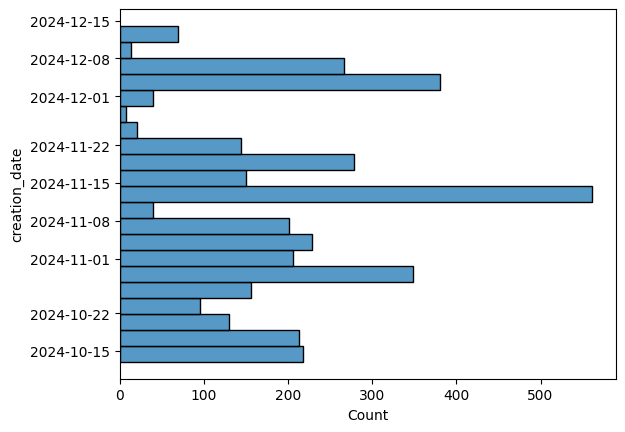

In [36]:
import seaborn as sns

sns.histplot(old_unknown_traders, y="creation_date")

<Axes: xlabel='Count', ylabel='creation_date'>

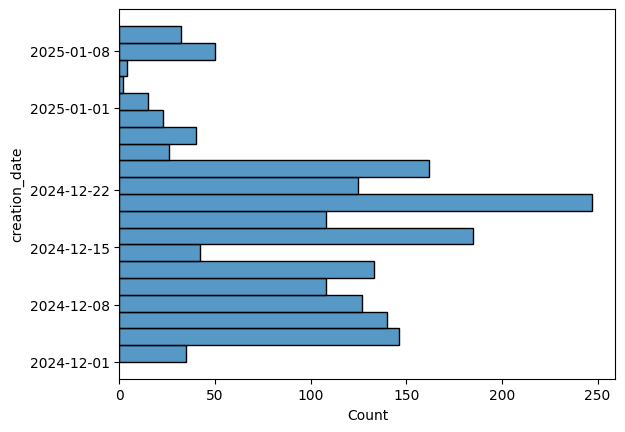

In [21]:
sns.histplot(unknown_traders, y="creation_date")

In [37]:

unknown_traders_df: pd.DataFrame = pd.concat(
    [unknown_traders, old_unknown_traders], ignore_index=True
)
unknown_traders_df.drop_duplicates("trade_id", keep="last", inplace=True)


<Axes: xlabel='Count', ylabel='creation_date'>

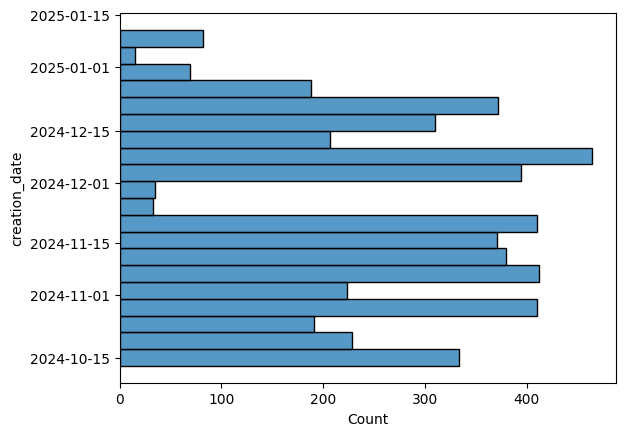

In [38]:
sns.histplot(unknown_traders_df, y="creation_date")

In [39]:
from datetime import datetime
cutoff_date1 = "2024-11-13"
timestamp1 = pd.Timestamp(
datetime.strptime(cutoff_date1, "%Y-%m-%d")
).tz_localize("UTC")

In [40]:
unknown_traders_df = unknown_traders_df.loc[unknown_traders_df["creation_timestamp"]>=timestamp1]

<Axes: xlabel='Count', ylabel='creation_date'>

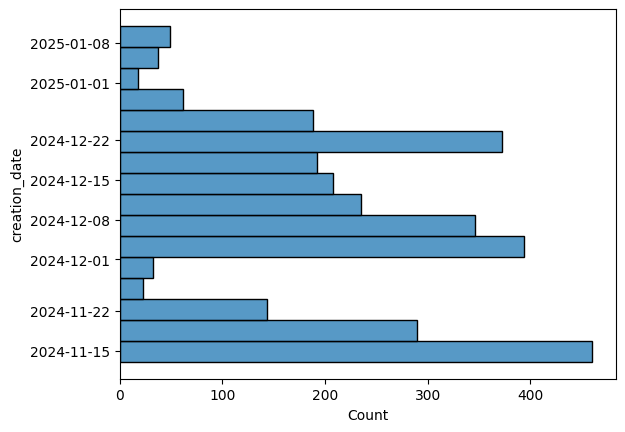

In [41]:
sns.histplot(unknown_traders_df, y="creation_date")

In [42]:
unknown_traders_df.drop("creation_date", axis=1, inplace=True)

In [43]:
unknown_traders_df.to_parquet("../data/unknown_traders.parquet", index=False)

In [3]:
unknown_traders.head()

trader_address market_creator  \
0  0x23522318aebb55b55879b60fb3ad4682abc6cc2f     quickstart   
1  0x8c4abc95e0091bf3bffe723d2b3c958edf642549     quickstart   
2  0xb3ead49f4797662511816d2798f774dee3603185     quickstart   
3  0x2dd9f5678484c1f59f97ed334725858b938b4102     quickstart   
4  0x2dd9f5678484c1f59f97ed334725858b938b4102     quickstart   

                                            trade_id  \
0  0xeeaadfc4d0ef3f3bb1c430bc96657ed01a52e3e20x23...   
1  0x6df8ac2c78c8a801d6b6f30e19d3c193daf54f1e0x8c...   
2  0x4cb63dbf490e1f8f7c10d1e62be7ae6bbbb6d0790xb3...   
3  0x005e5be235ba39c5f17622d25e77557ee79a2cba0x2d...   
4  0x0080b3768232e8a2f187eaaf342923034275e0b90x2d...   

         creation_timestamp  \
0 2024-12-23 12:36:05+00:00   
1 2024-12-24 07:22:50+00:00   
2 2024-12-23 12:50:40+00:00   
3 2024-12-22 02:40:35+00:00   
4 2024-12-13 04:32:35+00:00   

                                               title market_status  \
0  Will any additional Amazon facilities join the...        CLOSED   
1  Will the World Health Organization issue an of...        CLOSED   
2  Will Dominion Energy announce any additional p...        CLOSED   
3  Will the Federal Reserve signal a plan to slow...        CLOSED   
4  Will Russia officially confirm Bashar al-Assad...        CLOSED   

   collateral_amount outcome_index  trade_fee_amount  outcomes_tokens_traded  \
0           0.401540             0          0.004015                0.939802   
1           0.298503             0          0.002985                0.624681   
2           0.423050             1          0.004230                0.687175   
3           1.568561             1          0.015686                2.474096   
4           2.677632             0          0.026776                5.135035   

   ...  is_invalid  winning_trade  earnings  redeemed  redeemed_amount  \
0  ...       False           True  0.939802      True         0.939802   
1  ...       False           True  0.624681      True         0.624681   
2  ...       False          False  0.000000     False         0.000000   
3  ...       False          False  0.000000      True         0.000000   
4  ...       False           True  5.135035      True         5.135035   

   num_mech_calls  mech_fee_amount  net_earnings       roi   staking  
0               0              0.0      0.534247  1.317323  non_Olas  
1               0              0.0      0.323193  1.071994  non_Olas  
2               0              0.0     -0.427280 -1.000000  non_Olas  
3               0              0.0     -1.584247 -1.000000  non_Olas  
4               0              0.0      2.430627  0.898765  non_Olas  

[5 rows x 21 columns]

In [4]:
len(unknown_traders)

1568